### Trabajo Semanal 4

En esta tarea semanal retomamos la consigna de la tarea anterior, donde simulamos el bloque de cuantización de un ADC de B bits en un rango de  ±VF

Volts. Ahora vamos a completar la simulación del ADC incluyendo la capacidad de muestrear a fs Hertz.

Para ello se simulará el comportamiento del dispositivo al digitalizar una senoidal contaminada con un nivel predeterminado de ruido. Comenzaremos describiendo los parámetros a ajustar de la senoidal:

    frecuencia f0

arbitraria, por ejemplo f0=fS/N=Δf

     
    energía normalizada, es decir energía (o varianza) unitaria

Con respecto a los parámetros de la secuencia de ruido, diremos que:

    será de carácter aditivo, es decir la señal que entra al ADC será sR=s+n

. Siendo n la secuencia que simula la interferencia, y s
la senoidal descrita anteriormente.
La potencia del ruido será Pn=kn.Pq
W siendo el factor k una escala para la potencia del ruido de cuantización Pq=q212
.
finalmente, n

    será incorrelado y Gaussiano.

El ADC que deseamos simular trabajará a una frecuencia de muestreo fS=1000
Hz y tendrá un rango analógico de ±VF=2 Volts.

Inclusión de librerías

In [1]:
# -*- coding: utf-8 -*-
"""

@author: Hugo Alejandro Gomez

Descripción:
------------
Simulador de ADC

"""
#%%  Librerias
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig



Definimos las funciones que vamos a utilizar

In [2]:
#%%  Definición de funciones a utilizar

def funcionSeno (vmax, dc, ff, ph, nn, fs):
    
    # Grilla de sampleo temporal
    tt = np.arange(0.0, nn/fs, 1/fs)
    # Calculo de los valores punto a punto de la funcion
    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc
    
    return tt,xx
    


Inicialización de variables

In [3]:
#%%  Script de referencia para generación de gráficos
# Datos generales de la simulación
fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras

T = n/fs

# cantidad de veces más densa que se supone la grilla temporal para tiempo "continuo"
over_sampling = 4
N_os = N*over_sampling
 
# Datos del ADC
B = 4 # bits
Vf = 2 # Volts
q = Vf/2**B # Volts
 
# datos del ruido
kn = 10
pot_ruido = q**2/12 * kn # Watts (potencia de la señal 1 W)
 
ts = 1/fs # tiempo de muestreo
df = fs/N # resolución espectral

Simulación

In [4]:
#%% Acá arranca la simulación
 
# ....
tt,analog_sig = funcionSeno( vmax=1, dc=0, ff=10, ph=0, nn=N, fs=fs)
tt_os = np.arange(0.0, N_os/fs, 1/fs)

n=np.arange(N)
ff = n/T
#Se agrega ruido uniforme a la señal senoidal
#ruido = np.random.uniform(0,(np.sqrt(48)),1000)
sr = analog_sig + np.random.uniform(0,pot_ruido,1000)

srq = q * np.round(sr/q)

Presentación gráfica de los resultados

NameError: name 'tt_os' is not defined

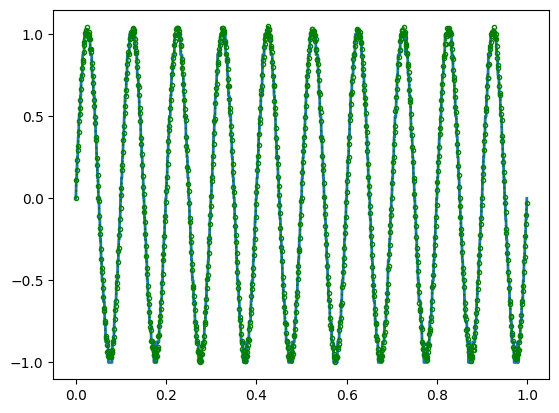

In [5]:
#%% Presentación gráfica de los resultados
plt.close('all')
 
plt.figure(1)
plt.plot(tt, srq, lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)')
plt.plot(tt, sr, linestyle=':', color='green',marker='o', markersize=3, markerfacecolor='none', markeredgecolor='green', fillstyle='none', label='$ s_R = s + n $  (ADC in)')
plt.plot(tt_os, analog_sig, color='orange', ls='dotted', label='$ s $ (analog)')
 
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [V]')
axes_hdl = plt.gca()
axes_hdl.legend()
plt.show()
 
 
plt.figure(2)
bfrec = ff <= fs/2
 
Nnq_mean = np.mean(np.abs(ft_Nq)**2)
 
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Srq[bfrec])**2), lw=2, label='$ s_Q = Q_{B,V_F}\{s_R\} $ (ADC out)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_As[ff_os <= fs/2])**2), color='orange', ls='dotted', label='$ s $ (analog)' )
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_SR[bfrec])**2), ':g', label='$ s_R = s + n $  (ADC in)' )
plt.plot( ff_os[ff_os <= fs/2], 10* np.log10(2*np.abs(ft_Nn[ff_os <= fs/2])**2), ':r')
plt.plot( ff[bfrec], 10* np.log10(2*np.abs(ft_Nq[bfrec])**2), ':c')
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([nNn_mean, nNn_mean]) ), '--r', label= '$ \overline{n} = $' + '{:3.1f} dB (piso analog.)'.format(10* np.log10(2* nNn_mean)) )
plt.plot( np.array([ ff[bfrec][0], ff[bfrec][-1] ]), 10* np.log10(2* np.array([Nnq_mean, Nnq_mean]) ), '--c', label='$ \overline{n_Q} = $' + '{:3.1f} dB (piso digital)'.format(10* np.log10(2* Nnq_mean)) )
plt.title('Señal muestreada por un ADC de {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q) )
plt.ylabel('Densidad de Potencia [dB]')
plt.xlabel('Frecuencia [Hz]')
axes_hdl = plt.gca()
axes_hdl.legend()
# suponiendo valores negativos de potencia ruido en dB
plt.ylim((1.5*np.min(10* np.log10(2* np.array([Nnq_mean, nNn_mean]))),10))
 
 
plt.figure(3)
bins = 10
plt.hist(nq, bins=bins)
plt.plot( np.array([-q/2, -q/2, q/2, q/2]), np.array([0, N/bins, N/bins, 0]), '--r' )
plt.title( 'Ruido de cuantización para {:d} bits - $\pm V_R= $ {:3.1f} V - q = {:3.3f} V'.format(B, Vf, q))